In [34]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# 1. Generate sine wave data
np.random.seed(42)
timesteps = np.linspace(0, 100, 1000)
data = np.sin(timesteps) + 0.1 * np.random.randn(len(timesteps))

# 2. Prepare sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i+1: + i+window_size+1])

    return np.array(X), np.array(y)

window_size = 20
X, y = create_sequences(data, window_size)
X = X.reshape((X.shape[0], X.shape[1], 1))

# 3. Train/test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]



In [8]:
print(X_train.shape[2])

1


In [35]:

# 4. Build RNN model with return_sequences=True
model = Sequential([
    SimpleRNN(50, activation='tanh', return_sequences=True, input_shape=(window_size, 1)),
    SimpleRNN(50, activation='tanh',return_sequences=True),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# 5. Train
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.1, verbose=1)

# 6. Predict
preds = model.predict(X_test)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_8 (SimpleRNN)        │ (None, 20, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_9 (SimpleRNN)        │ (None, 20, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 20, 1)          │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,701 (30.08 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.3321 - val_loss: 0.0297
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0257 - val_loss: 0.0197
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0196 - val_loss: 0.0179
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0183 - val_loss: 0.0175
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0176 - val_loss: 0.0173
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0178 - val_loss: 0.0170
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0176 - val_loss: 0.0166
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0172 - val_loss: 0.0170
Epoch 9/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0174 - val_loss: 0.0169
Epoch 10/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0174 - val_loss: 0.0165
Epoch 11/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0168 - val_loss: 0.0162
Epoch 12/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


[-0.05502428 -0.19077667 -0.33961972 -0.59127781 -0.47054168 -0.57591549
 -0.64673333 -0.87202625 -0.91546503 -0.75696906 -0.91253193 -0.87762205
 -0.97066724 -0.98850406 -0.90570554 -1.04918563 -0.97602887 -1.01006036
 -0.97582476 -0.92250003]


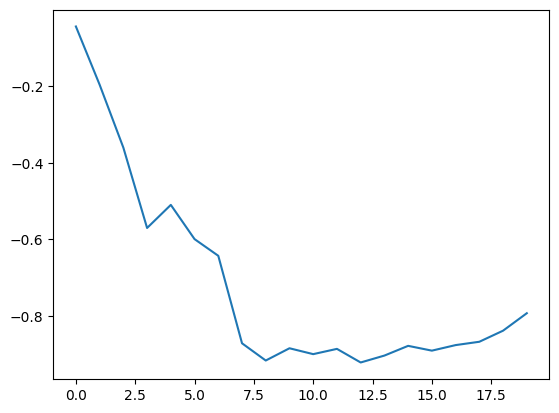

In [57]:
plt.plot(preds[2,:,0])
print(X_test[2,:,0])

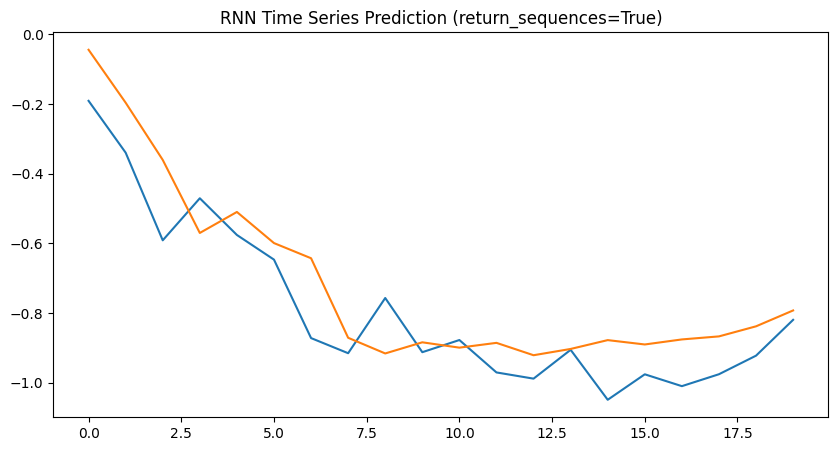

In [58]:
plt.figure(figsize=(10, 5))
#plt.plot(range(len(y_test[2,:])), y, label="True")
#plt.plot(range(split, len(y_test[2,:])), preds[2,:,:], label="Predicted")
plt.plot(y_test[2,:])
plt.plot(preds[2,:,0])
#plt.legend()
plt.title("RNN Time Series Prediction (return_sequences=True)")
plt.show()

Epoch [5/30], Loss: 0.444822
Epoch [10/30], Loss: 0.337296
Epoch [15/30], Loss: 0.245132
Epoch [20/30], Loss: 0.142009
Epoch [25/30], Loss: 0.089824
Epoch [30/30], Loss: 0.072733


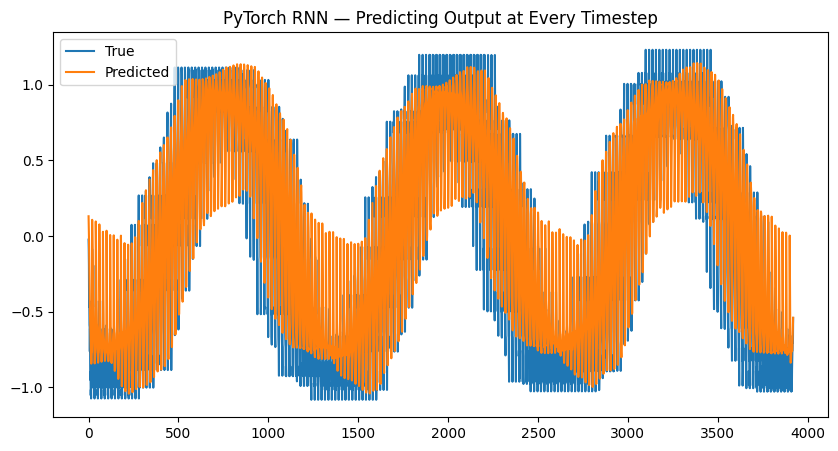

In [59]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Generate toy sine wave data
np.random.seed(0)
t = np.linspace(0, 100, 1000)
data = np.sin(t) + 0.1 * np.random.randn(len(t))

# 2️⃣ Create sequences (X → Y shifted by one timestep)
def create_sequences(data, seq_len):
    X, Y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        Y.append(data[i+1:i+seq_len+1])  # target is next-step sequence
    return np.array(X), np.array(Y)

seq_len = 20
X, Y = create_sequences(data, seq_len)

# Convert to tensors
X = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)  # (batch, seq, 1)
Y = torch.tensor(Y, dtype=torch.float32).unsqueeze(-1)  # (batch, seq, 1)

# Split into train/test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]

# 3️⃣ Define RNN model that outputs prediction for each timestep
class SequenceRNN(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, output_size=1):
        super().__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)             # out: (batch, seq_len, hidden)
        out = self.fc(out)               # predict output for every timestep
        return out                       # (batch, seq_len, output_size)

# 4️⃣ Initialize model, loss, optimizer
model = SequenceRNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 5️⃣ Train
epochs = 30
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, Y_train)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")

# 6️⃣ Evaluate
model.eval()
with torch.no_grad():
    preds = model(X_test)

# Convert predictions for plotting
preds = preds[:, :, 0].flatten().numpy()
true = Y_test[:, :, 0].flatten().numpy()

# 7️⃣ Plot results
plt.figure(figsize=(10,5))
plt.plot(true, label='True')
plt.plot(preds, label='Predicted')
plt.legend()
plt.title("PyTorch RNN — Predicting Output at Every Timestep")
plt.show()
